<a href="https://colab.research.google.com/github/LoPA607/AIDS_248/blob/main/special_rvs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider
import numpy as np

# Special random variables

The following sections introduce the various special random variables.

 * These are frequently encountered.
 * Useful and fundamentally important.


## Bernoulli Random variable (Bernoulli trial)

* Experiment is one of success/failure

* $X = 1$ on success
* $X = 0$ on failure
* $P(X=1) = p$
* $P(X=0) = 1-p$


###  Pop quiz!

* $E[X] = $?
* $Var(X) = $?


### Answer

* $E[X] = p$
* $Var(X) = p(1-p)$


## Binomial Random variable

- $n$ independent Bernoulli trials (probability for success, $p$), $X_i$
- $X$ is number of successes

Clearly:

if $X = \sum_{i=1}^n X_i$

- $P[X=i] = {{n}\choose{i}} p^i (1-p)^{n-i}$ where $i=0, 1, \ldots n$

- $E[X] = np$

- $Var(X) = np(1-p)$

- Called the binomial random variable with parameters $(n,p)$.


In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# See here: https://docs.scipy.org/doc/scipy/reference/stats.html
from scipy.stats import binom
rv = binom(5, 0.25)

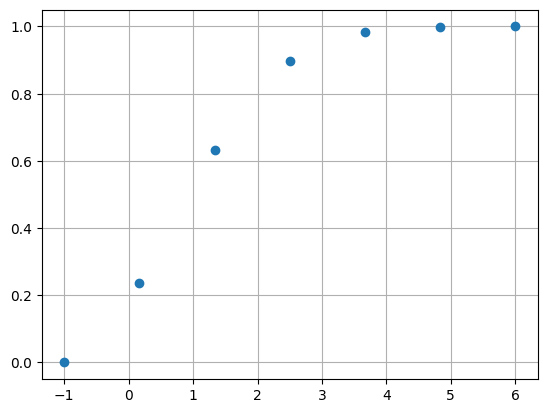

In [7]:
x = np.linspace(-1, 6, 7)
y = rv.cdf(x)
plt.grid()
plt.plot(x, y, 'o');

In [8]:
# rvs - Random VariateS
rv.rvs(20)

array([1, 0, 1, 3, 2, 2, 0, 1, 3, 1, 0, 2, 0, 3, 2, 0, 1, 2, 1, 1])

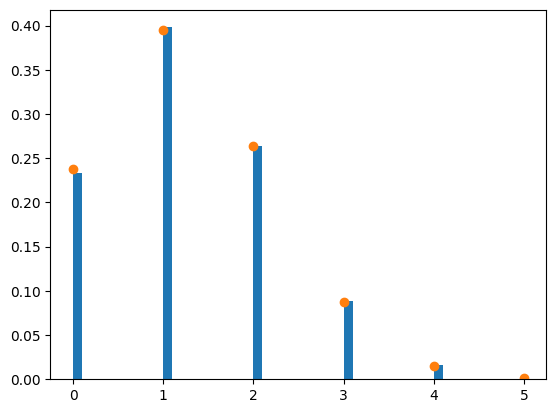

In [9]:
plt.hist(rv.rvs(50000), density=True, bins=5, width=0.1);
x1 = np.arange(0, 6, 1)
plt.plot(x1, rv.pmf(x1), 'o');

## Showing it a bit better


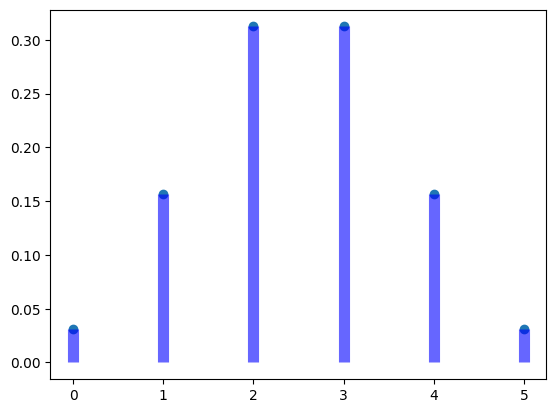

In [17]:
rv = binom(5, 0.5)
x = np.arange(0, 6)
plt.plot(x, rv.pmf(x), 'o')
plt.vlines(x, 0., rv.pmf(x), colors='b',
           alpha=0.6, lw=8);

### Comparing with a normal distribution


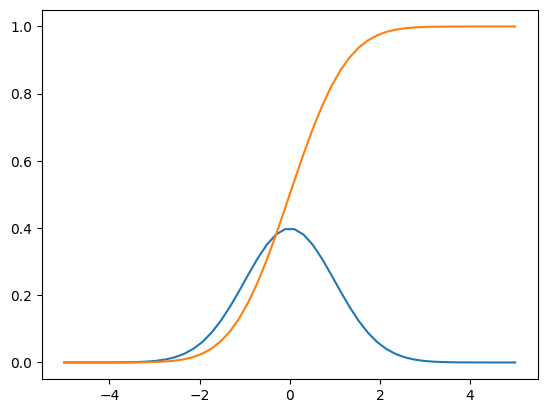

In [27]:
from scipy.stats import norm
rv = norm(loc=0, scale=1)
# loc is mean, scale is std-dev
x = np.linspace(-5, 5)
plt.plot(x, rv.pdf(x));
plt.plot(x, rv.cdf(x));

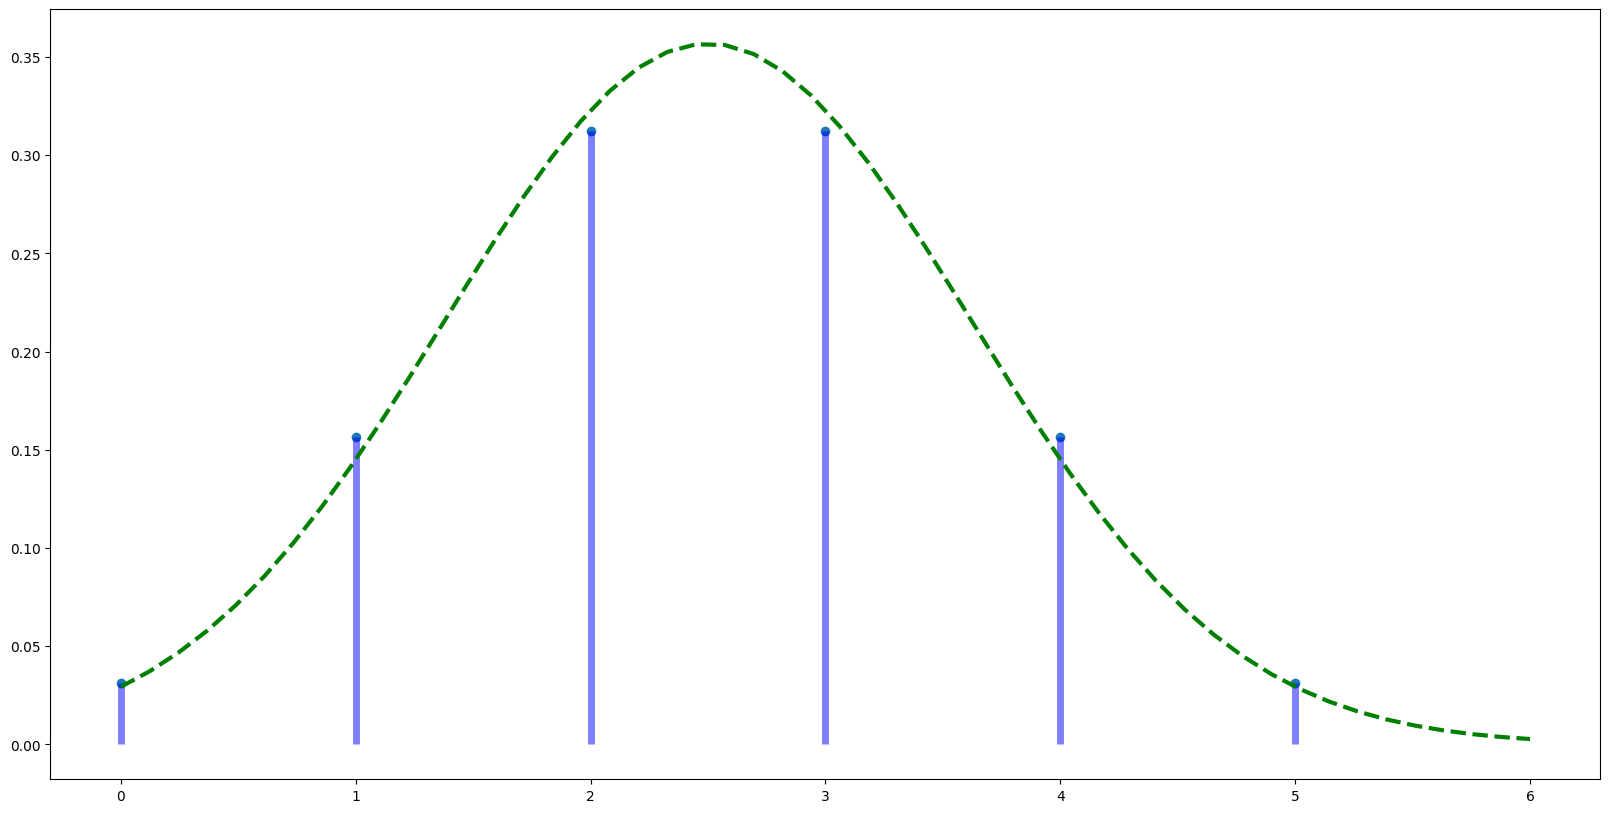

In [32]:
from scipy.stats import binom, norm
import numpy as np
f = plt.figure(figsize=(20, 10))
x = np.arange(0, 6)
p = 0.5
n = 5
rv = binom(n, p)
plt.plot(x, rv.pmf(x), 'o')
plt.vlines(x, 0, rv.pmf(x), colors='b', alpha=0.5, lw=5)
mu, sigma = n*p, np.sqrt(n*p*(1-p))
rv1 = norm(loc=mu, scale=sigma)
x1 = np.linspace(0, 6)
plt.plot(x1, rv1.pdf(x1), 'g--', lw=3);

## Putting it together nicely


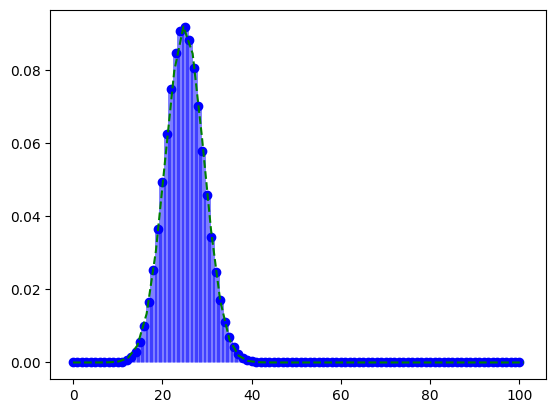

In [33]:
import numpy as np
from scipy.stats import binom, norm

def plot_binom(n, p):
    rv = binom(n, p)
    x = np.arange(0, n+1)
    plt.plot(x, rv.pmf(x), 'bo')
    plt.vlines(x, 0, rv.pmf(x), colors='b', alpha=0.5, lw=5)
    # Compare with a normal distribution
    mu, sigma = n*p, np.sqrt(n*p*(1-p))
    x1 = np.linspace(0, n+1)
    plt.plot(x1, norm.pdf(x1, loc=mu, scale=sigma), 'g--')
    #plt.show()

plot_binom(100, 0.25)

## Adding some interactivity to make this nicer

Uses the ipywidgets Python package,  pip install it if you do not have it.


In [34]:
interact(plot_binom, n=FloatSlider(min=1, max=100, value=5, step=1), p=(0.01, 0.99, 0.01));
#interact(plot_binom, n=(1, 100), p=(0.01, 0.99));

interactive(children=(FloatSlider(value=5.0, description='n', min=1.0, step=1.0), FloatSlider(value=0.5, descr…


Note that:

- As $n$ increases it seems to behave like a Gaussian.

- $P[X = k+1] = \frac{p}{1-p} \frac{n-k}{k+1} P[X=k]$


## An exercise in probabilistic programming: part 1

Consider a coin that is biased with probability of 0.7 heads and 0.3 tails.

1. Consider the function `np.random.random()`, recall what it does.  Now write a function to model this coin using the `np.random.random()`.


In [ ]:
# Solution part 1.
def bern():
    x = np.random.random()
    if x < 0.7:
        return 1
    else:
        return 0

In [ ]:
n = 10000
result = []
for i in range(n):
    result.append(bern())
sum(result)/n

In [ ]:
# Or using scipy.stats
from scipy.stats import bernoulli
rv = bernoulli(0.7)
sum(rv.rvs(n))/n

## An exercise in probabilistic programming: part 2

Consider a coin that is biased with probability of 0.7 heads and 0.3 tails.

2. Now consider taking N such coin tosses.  Choose N to be 10 (it should really be a parameter you pass to your function).  Now use the above function from part 1 to model these N coin tosses in a probabilistic fashion by repeating the coin toss experiment many many times.


In [ ]:
# Solution part 2.
rv = bernoulli(0.7)
def binom(n):
    result = rv.rvs(n)
    return sum(result)

def repeat_experiment(n_exp, n_binom):
    results = []
    for i in range(n_exp):
        results.append(binom(n_binom))
    return results

plt.hist(repeat_experiment(10000, 10));

## The Poisson random variable

$X = 0, 1, 2, \ldots$ with parameter $\lambda>0$ such that,

 * $P[X=i] = e^{-\lambda} \frac{\lambda^i}{i!}$


### Exercise

Show that this is a proper PMF, i.e. $\sum_{i=0}^\infty p(i) = 1$

MGF is given as:

* $\phi(t) = E[e^{tX}]= ?? $
* $E[X] = \lambda$
* $Var(X) = \lambda$

* This approximates the binomial RV when $n$ is large and $p$ is small.
* That is for large $n$ and small $p$:

$$P_{binomial} [X=i] \approx e^{-\lambda} \frac{\lambda^i}{i!}$$



### Examples

1. Number of wrong telephone numbers dialled in a day by all students.
2. Number of customers visiting a shop on a given day.
3. Number of misprints on a page.
4. Number of $\alpha$ particles discharged in time $T$ from a radioactive substance.


In [35]:
from scipy.stats import poisson
rv = poisson(1.0)

In [36]:
from scipy.stats import poisson, norm

def plot_poisson(lamda):
    rv = poisson(lamda)
    min, max = rv.ppf(0.0001), rv.ppf(0.9999999999)
    x = np.arange(min, max)
    plt.plot(x, norm.pdf(x, loc=lamda, scale=np.sqrt(lamda)), 'g--')
    plt.plot(x, rv.pmf(x), 'bo')
    plt.vlines(x, 0, rv.pmf(x), colors='b', alpha=0.5, lw=5)
    plt.xlim(0, 50)

#plot_poisson(1.0)
interact(plot_poisson, lamda=FloatSlider(min=0.0, max=100, value=4));

interactive(children=(FloatSlider(value=4.0, description='lamda'), Output()), _dom_classes=('widget-interact',…

## Programming exercise

1. Make a plot of the PMF of a binoimial random variable.
2. Superimpose an equivalent Poisson RV on this.
3. Make this interactive with suitable sliders.


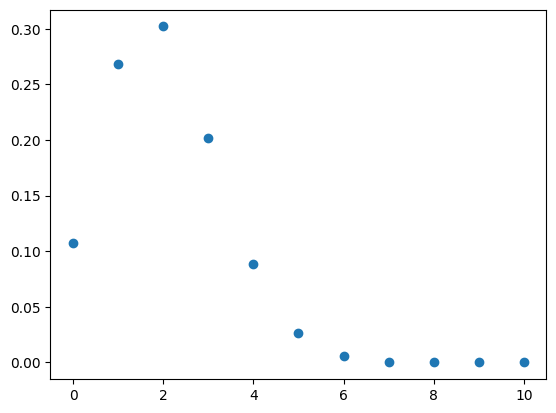

In [37]:
# Solution part 1
from scipy.stats import binom
binom_rv = binom(10, 0.2)
x = np.arange(0, 11)
plt.plot(x, binom_rv.pmf(x), 'o');
# Complete this!

In [38]:
# solution...

### Exercise

Suppose that the average number of accidents occurring weekly on a
particular stretch of a highway equals 3. Calculate the probability that
there is at least one accident this week.


### Generating random numbers from Poisson distribution


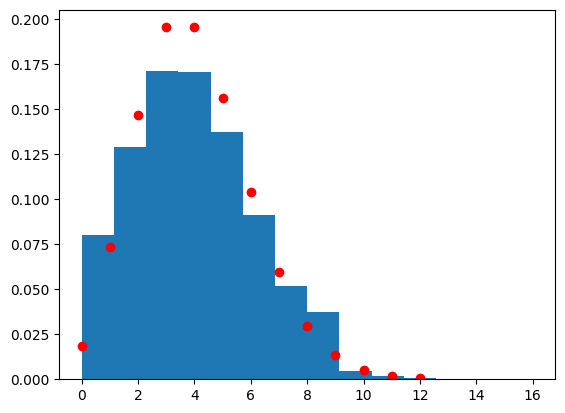

In [39]:
from scipy.stats import poisson
rv = poisson(4)
values = rv.rvs(100000)
plt.hist(values, bins=14, density=True)
x = range(0, 13)
plt.plot(x, rv.pmf(x), 'ro');

### Note

* $P\{X=i+1\} = \frac{\lambda}{i+1} P\{X=i\}$
* The sum of independent Poisson random variables is also a Poisson RV.
    * Proof using MGF.  Show this!


## The Uniform Random Variable

$f(x) = \frac{1}{\beta - \alpha}$ when
$\alpha \leq x \leq \beta$ and 0 otherwise

* This is a continuous RV

* $E[X] = (\alpha + \beta)/2$
* $Var(X) = (\beta - \alpha)^2/12$

* Available in `numpy.random.random`


## Normal random variables

Given parameters $\mu$ and $\sigma^2$, we have:

$f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-(x-\mu)^2/(2\sigma^2)}$

* We will be seeing quite a bit of this RV.
* Approximates binomial when $n$ is large, already seen this!


* Many measurements are distributed normally.
* Velocity in any direction of a molecule of gas.
* Variation in height of a person.


In [40]:
from scipy.stats import norm

def plot_normal(mu, sigma):
    rv = norm(loc=mu, scale=sigma)
    min, max = rv.ppf(0.000001), rv.ppf(0.999999)
    x = np.linspace(min, max)
    plt.xlim(-20, 20)
    plt.ylim(0, 0.5)
    plt.plot(x, rv.pdf(x))

interact(plot_normal, mu=FloatSlider(min=-10., max=10., value=0.0),
         sigma=FloatSlider(min=0.01, max=10, value=1.0));

interactive(children=(FloatSlider(value=0.0, description='mu', max=10.0, min=-10.0), FloatSlider(value=1.0, de…

We can show that:

* $E[X] = \mu$
* $Var(X) = \sigma^2$
* $E[a + bX] = a + b\mu$
* $Var(a + bX) = b^2\sigma^2$
* MGF = $exp(\mu t + \sigma^2 t^2/2)$


### Standard/unit Normal Distribution

If $Z = \frac{X-\mu}{\sigma}$

Then $Z$ has mean 0 and variance 1, this is a standard normal distribution, we denote $\phi$ as the distribution function:

$\phi(x) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^x e^{-y^2/2} dy$

Therefore:

$P\{X<b\} = P \left\{ \frac{X-\mu}{\sigma} < \frac{b-\mu}{\sigma}\right\}$

$P\{X<b\} = \phi(\frac{b-\mu}{\sigma})$

Also,
$P\{a<X < b \} = \phi(\frac{b-\mu}{\sigma}) - \phi(\frac{a-\mu}{\sigma})$


By symmetry:

$\phi(-x) = P\{Z < -x \} = P\{Z > x \} = 1 - \phi(x)$



### Useful results

* Sum of independent normal RVs is also normal.

    * Let $X_i$ be normal with $\mu_i, \sigma_i$ and consider MGF.

    * Note that if MGF/moments are same, then distribution is same.


For $0< \alpha < 1$, let $z_\alpha$ be such that,

$P\{Z > z_\alpha \} = 1 - \phi(z_\alpha) = \alpha$

Clearly,

$P\{Z < z_\alpha \} = 1 - \alpha$



### Exercise

Use the table A1 in the book to answer these questions. If $X$ is a normal
random variable with mean $\mu = 4$ and $\sigma^2 = 16$, find

- (a) $P\{X < 11 \}$
- (b) $P\{X > -1 \}$
- (c) $P\{2 < X < 7\}$


0.9599408431361829
1.6448536269514722
0.9599408431361829
1.6448536269514729


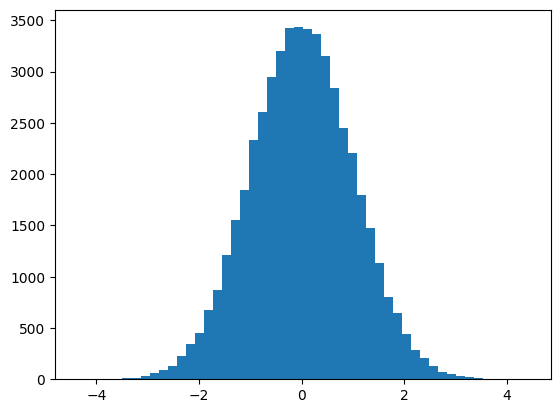

In [41]:
from scipy.stats import norm
rv = norm(loc=0.0, scale=1)
x = 1.75
print(rv.cdf(1.75))
print(rv.ppf(0.95))
print(1 - rv.sf(1.75)) # This is 1 - phi(x)
print(rv.isf(0.05)) # this is the inverse, i.e. given alpha, it
plt.hist(rv.rvs(50000), bins=50);

## Exponential Random Variables

For $\lambda > 0$,

$f(x) = \lambda e^{-\lambda x}$ when $x \geq 0$ and 0 otherwise


$F(x) = 1 - e^{-\lambda x}$ when $x \geq 0$.


This is the amount of time until some specific event occurs:

* Time until an earthquake occurs
* Time until a telephone call is a wrong number.


### Exponential Random Variables

* $E[X] = 1/\lambda$
* $Var(X) = 1/\lambda^2$
* MGF:  $\lambda/(\lambda - t)$ when $t<\lambda$.

The Exponential distribution is memoryless.

* $P\{ X > s+t | X> t \} = P \{ X > s \} \forall s, t \geq 0$

This means that if an item is functioning, it is as good as new!


### Examples

- The time between events in a *Poisson process*.
- Poisson process: events occur independently, continuously at a constant average rate.

- Time it takes before your next phone call (at a specified time of day/week)
- Time between clicks of a Gieger counter.


### Exercise

How do you show that this distribution is memoryless?


In [44]:
def exp(lamda):
    x = np.linspace(0, 10, 1000)
    plt.plot(x, lamda*np.exp(-lamda*x))
    plt.xlim(0, 1); plt.ylim(0, 5)

interact(exp, lamda=(0, 10, 0.1));

interactive(children=(FloatSlider(value=5.0, description='lamda', max=10.0), Output()), _dom_classes=('widget-…

## Chi-squared distribution

Let $Z_1, Z_2 ... Z_n$ be independent standard normal random variables, then

$X = Z_1^2 + Z_2^2 + ... + Z_n^2$

is a chi-squared distribution with $n$ degrees of freedom ($X \sim \chi_n^2$).

Obviously, if $X_1$ and $X_2$ are independent chi-square distributions with $n_1$ and $n_2$ dof, their sum is
also chi-square but with $n_1+n_2$ degrees of freedom.

* $E[X] = n$
* $Var(X) = 2n$

Same as gamma distribution with $\alpha=n/2$ and $\lambda = 1/2$

Useful to define a quantity $\chi_{\alpha, n}^2$ such that:

$P\{X \geq \chi_{\alpha, n}^2\} = \alpha$


In [45]:
from scipy.stats import chi2
import numpy as np

def plot_chi2(n):
    rv = chi2(n)
    min, max = rv.ppf(0.0001), rv.ppf(0.9999)
    x = np.linspace(min, max, 200)
    plt.figure(figsize=(20, 10))
    plt.xlim(0, 30)
    plt.ylim(0, 0.5)
    plt.plot(x, rv.pdf(x))
    plt.grid()

interact(plot_chi2, n=(1, 20, 1));

interactive(children=(IntSlider(value=10, description='n', max=20, min=1), Output()), _dom_classes=('widget-in…

## Nice example from textbook!

When we attempt to locate a target in two-dimensional space, suppose that
the coordinate errors are independent normal random variables with mean 0
and standard deviation 2. Find the probability that the distance between
the point chosen and the target exceeds 3.


## Student's t-distribution

Consider independent $Z$ and $\chi_n^2$ then,

$T_n = \frac{Z}{\sqrt{(\chi_n^2)/n}}$

Note from the definition of the chi-square function that
when $n$ is large $T_n$ has a similar distribution to $Z$.

* $E[T_n] = 0$
* $Var(T_n) = \frac{n}{n-2}$


In [46]:
from scipy.stats import t, norm

def plot_t(n):
    rv = t(n)
    x = np.linspace(-5, 5, 200)
    plt.figure(figsize=(20, 10))
    plt.plot(x, norm.pdf(x), 'g--')
    plt.plot(x, rv.pdf(x))

interact(plot_t, n=IntSlider(min=1, max=50, step=1, value=1));

interactive(children=(IntSlider(value=1, description='n', max=50, min=1), Output()), _dom_classes=('widget-int…

## The Gamma distribution

$f(x) = \frac{\lambda^\alpha x^{\alpha -1} e^{-\lambda x}}{\Gamma(\alpha)}$

with $\lambda, \alpha >0$ and $x\geq 0$.

One can show that:
* $\Gamma(1) = 1$
* $\Gamma(\alpha) = (\alpha -1)\Gamma(\alpha -1)$
* $\Gamma(n) = (n-1)!$
* $\chi_2$ with $n$ dof is same as $\Gamma(n/2), \lambda = 1/2$


In [47]:
from scipy.stats import gamma

def plot_gamma(alpha, lamda):
    rv = gamma(a=alpha, scale=1.0/lamda)
    min, max = rv.ppf(0.00001), rv.ppf(0.9999)
    x = np.linspace(min, max)
    #plt.xlim(-15, 15)
    #plt.ylim(0, 0.25)
    plt.plot(x, rv.pdf(x))

interact(plot_gamma, alpha=(0.0, 50), lamda=(0.0, 10, 0.1));

interactive(children=(FloatSlider(value=25.0, description='alpha', max=50.0), FloatSlider(value=5.0, descripti…